In [52]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

import importlib
import sys
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.interpolate import interp1d, RectBivariateSpline
from scipy.integrate import simps

In [60]:
import pk_pregen as PK
import lensingZ, tools
from cosmology import Cosmology

In [54]:
importlib.reload(PK)


<module 'pk_pregen' from '/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/pk_pregen.py'>

# Pborn class

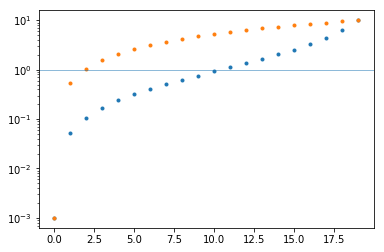

In [4]:
def atoz(a):
    return 1/a-1
def ztoa(z):
    return 1/(z+1)

zcmb = 10
acmb = ztoa(zcmb)

nz = 20 
aa = np.linspace(0.999, acmb, nz, endpoint=True)
# zz = np.logspace(-3, np.log10(zcmb), nz, endpoint=True)
zz = np.linspace(0.001, (zcmb), nz, endpoint=True)
# zz = np.hstack((np.arange(0.001, 2, 0.1), np.arange(2, 10, 1), np.arange(10, 100, 20), np.arange(100, 1000, 100)))
plt.plot(atoz(aa), '.')
plt.plot(zz, '.')
plt.axhline(1, lw=0.5)
plt.yscale('log')

32
[ 0.01  0.11  0.21  0.31  0.41  0.51  0.61  0.71  0.81  0.91  1.    1.2
  1.4   1.6   1.8   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.
  6.5   7.    7.5   8.    8.5   9.    9.5  10.  ]


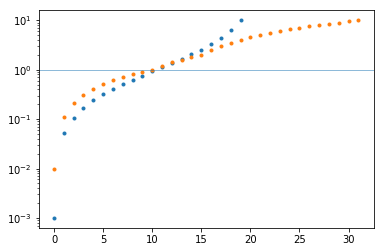

In [5]:
zz = np.hstack((np.arange(0.01, 1, 0.1), np.arange(1, 2, 0.2), np.arange(2, 10.1, 0.5)))
# zz = np.hstack((np.arange(1, 2, 0.2), np.arange(2, 10.1, 0.5)))
# np.savetxt('/global/homes/c/chmodi/Programs/class_public/pborncross/zstack2.txt', zz.reshape(-1, 1).T, fmt='%.4f', delimiter=',', 
#            header='np.hstack((np.arange(0.01, 1, 0.05), np.arange(1, 2, 0.2), np.arange(2, 10.1, 0.5)))')

plt.plot(atoz(aa), '.')
plt.plot(zz, '.')
plt.axhline(1, lw=0.5)
plt.yscale('log')
print(zz.size)
print(zz)

In [6]:
atoz(aa)

array([1.00100100e-03, 5.12972707e-02, 1.06915308e-01, 1.68746924e-01,
       2.37894986e-01, 3.15739773e-01, 4.04032058e-01, 5.05026356e-01,
       6.21676146e-01, 7.57927496e-01, 9.19174296e-01, 1.11298932e+00,
       1.35034805e+00, 1.64778169e+00, 2.03140184e+00, 2.54501662e+00,
       3.26818061e+00, 4.36199908e+00, 6.20963124e+00, 1.00000000e+01])

In [7]:
(atoz(aa) < 1).sum(), (atoz(aa) < 5).sum()

(11, 18)

In [8]:
# np.savetxt('/global/homes/c/chmodi/Programs/class_public/pborncross/zsample-n-%d-z%d.txt'%(nz, zcmb), atoz(aa).reshape(-1, 1).T, fmt='%.4f', delimiter=',', 
#            header='aa = np.linspace(0.999, acmb, %d, endpoint=True), zcmb=%d'%(nz, zcmb))

# class output load and play

In [9]:
print(['%0.3f'%i for i in atoz(np.linspace(ztoa(5), ztoa(5.2), 11, endpoint=True))])

['5.000', '5.019', '5.039', '5.059', '5.078', '5.098', '5.118', '5.139', '5.159', '5.179', '5.200']


In [30]:
(ztoa(0)-ztoa(0.2))


0.16666666666666663

In [51]:
atoz(1-0.02)

0.020408163265306145

In [28]:
da = 0.01
(ztoa(0)-ztoa(5))/da


83.33333333333333

In [49]:
####To read a basfile and write corresponding parameter fiels by changing 'z'

# strng = 'baselinev2'
# fname = '/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles2/class_%s_parameters.ini'%strng

# for z in np.arange(0.001, 5, 0.1):
#     z1, z2 = z, z+0.2
# #     aa1, aa2 = ztoa(z1), ztoa(z2)
# #     aa = np.linspace(aa1, aa2, 11, endpoint=True)
# #     zz = atoz(aa)
#     zz = np.linspace(z1, z2, 11, endpoint=True)
#     nondiag=len(zz)-1
#     fname2 = '/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles2/class_z%03dz%03dv2_inparameters.ini'%(z1*100, z2*100)
#     file = open(fname2, mode='w')
#     with open(fname) as f:
#         for line in f.readlines():
#             if 'selection_mean' in line:
#                 s = 'selection_mean='
#                 for i in zz:
#                     s +='%0.2f,'%i
#                 s = s[:-1]+'\n'
#                 file.write(s)
#             elif 'non_diagonal' in line:
#                 file.write('non_diagonal = %d\n'%nondiag)
#             elif 'root' in line:
#                 file.write('root = ./pborncross/inifiles2/class_z%03dz%03dv2_\n'%(z*100, (z+0.2)*100))
#             else:
#                 file.write(line)
#     file.close()


strng = 'baseline6'
fname = '/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles3/class_%s_parameters.ini'%strng
da = 0.01
for a in np.arange(1, ztoa(5), -da/2.):
    a1 = np.round(a, 3)
    a2 = np.round(a-da, 3)
    if (a1 - a2  != -0.01): print(a1, a2, a1-a2)
#     aa = np.linspace(a1, a2, 11, endpoint=True)
#     zz = atoz(aa)
#     nondiag=len(zz)-1
#     fname2 = '/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles3/class_a%03da%03d_inparameters.ini'%(a1*1000, a2*1000)
#     file = open(fname2, mode='w')
#     with open(fname) as f:
#         for line in f.readlines():
#             if 'selection_mean' in line:
#                 s = 'selection_mean='
#                 for i in zz:
#                     s +='%0.3f,'%i
#                 s = s[:-1]+'\n'
#                 file.write(s)
#             elif 'non_diagonal' in line:
#                 file.write('non_diagonal = %d\n'%nondiag)
#             elif 'root' in line:
#                 file.write('root = ./pborncross/inifiles3/class_a%03da%03d_\n'%(a1*1000, a2*1000))
#             else:
#                 file.write(line)
#     file.close()



1.0 0.99 0.010000000000000009
0.995 0.985 0.010000000000000009
0.99 0.98 0.010000000000000009
0.985 0.975 0.010000000000000009
0.98 0.97 0.010000000000000009
0.975 0.965 0.010000000000000009
0.97 0.96 0.010000000000000009
0.965 0.955 0.010000000000000009
0.96 0.95 0.010000000000000009
0.955 0.945 0.010000000000000009
0.95 0.94 0.010000000000000009
0.945 0.935 0.009999999999999898
0.94 0.93 0.009999999999999898
0.935 0.925 0.010000000000000009
0.93 0.92 0.010000000000000009
0.925 0.915 0.010000000000000009
0.92 0.91 0.010000000000000009
0.915 0.905 0.010000000000000009
0.91 0.9 0.010000000000000009
0.905 0.895 0.010000000000000009
0.9 0.89 0.010000000000000009
0.895 0.885 0.010000000000000009
0.89 0.88 0.010000000000000009
0.885 0.875 0.010000000000000009
0.88 0.87 0.010000000000000009
0.875 0.865 0.010000000000000009
0.87 0.86 0.010000000000000009
0.865 0.855 0.010000000000000009
0.86 0.85 0.010000000000000009
0.855 0.845 0.010000000000000009
0.85 0.84 0.010000000000000009
0.845 0.835 

In [79]:
# strng = 'baseline'
### Read in class output file and plot it folr the given column
strng = 'z020z040'
fname = '/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles/class_%s_parameters.ini'%strng


with open(fname) as f:
    for line in f.readlines():
        if 'selection_mean' in line:zzs = line
        else: pass

tmp = zzs[zzs.find('=')+1:-1]
zzs = np.array([float(i) for i in tmp.split(',')])
print(zzs)
nz = zzs.size
l = np.loadtxt('/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles/class_%s_cl.dat'%strng)[:, 0]

cl = np.loadtxt('/global/u1/c/chmodi/Programs/class_public/pborncross/class_%s_cl.dat'%strng)[:, 1:].T
clmesh = np.zeros((nz, nz, l.size))
count=0
for i in range(nz):
    for j in range(i, nz):
        clmesh[i, j, :] = cl[count]
        clmesh[j, i, :] = cl[count]
#         print(i, j, count)
        count +=1
# fig, axar = plt.subplots(1, 2, figsize = (15, 8), sharex=True, sharey=True)
# lss = ['-', '--', ':']
# # zzs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 1000]


# i = 1
# ax=axar[0]
# for j in range(nz):
#     ax.plot(l, abs(clmesh[i, j]), 'C%d%s'%(j%7,lss[j//7]), label='%0.2f-%0.2f'%(zzs[i],zzs[j]))
# #     ax.semilogy()
#     ax.legend()
#     ax.grid()
    
# i = 2
# ax=axar[1]
# for j in range(nz):
#     ax.plot(l, abs(clmesh[i, j]), 'C%d%s'%(j%7,lss[j//7]), label='%0.2f-%0.2f'%(zzs[i],zzs[j]))
#     ax.semilogy()
#     ax.legend()
#     ax.grid()
# # ax.semilogx()

### Read in class file and plot full mesh

In [18]:
cl.shape

(66, 2999)

[3.   3.02 3.04 3.06 3.08 3.1  3.12 3.14 3.16 3.18 3.2 ]


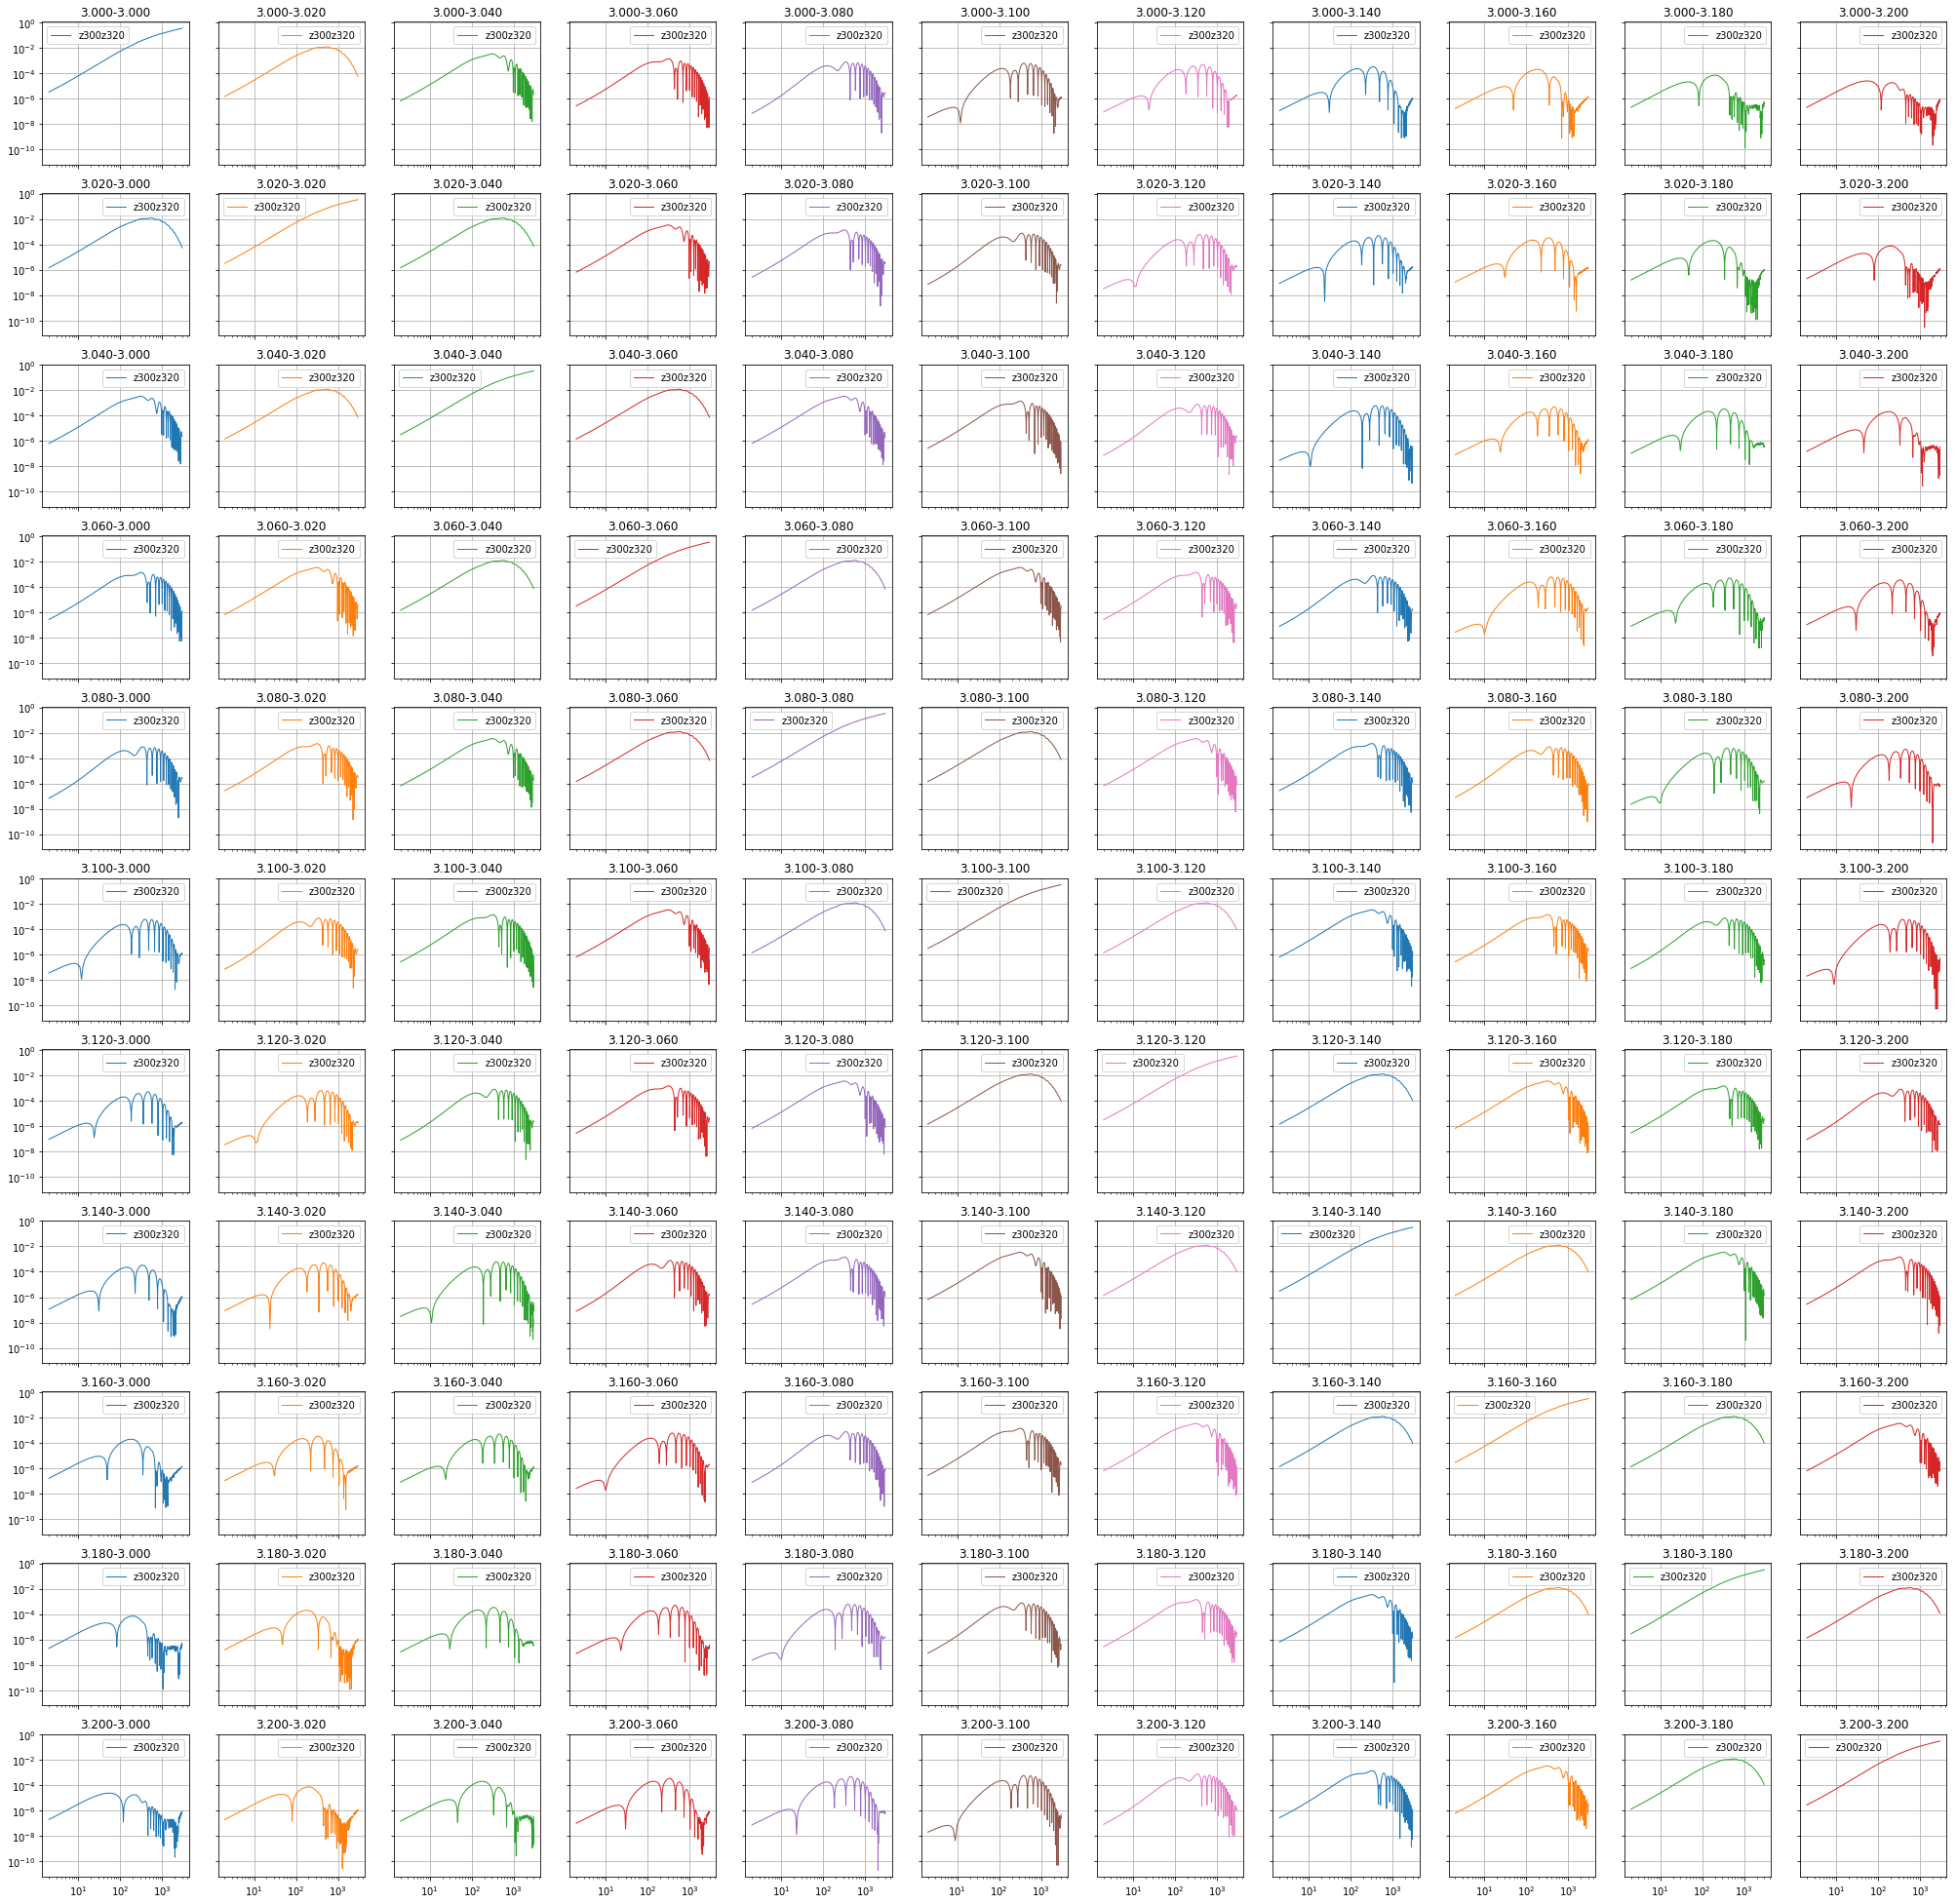

In [21]:
# strng = 'baseline'
### Read in class output file and plot it folr the given column

strng = 'z300z320'
fname = '/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles/class_%s_parameters.ini'%strng


with open(fname) as f:
    for line in f.readlines():
        if 'selection_mean' in line:zzs = line
        else: pass

tmp = zzs[zzs.find('=')+1:-1]
zzs = np.array([float(i) for i in tmp.split(',')])
print(zzs)
nz = zzs.size
l = np.loadtxt('/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles/class_%s_cl.dat'%strng)[:, 0]

##

fig, axar = plt.subplots(nz, nz, figsize = (35, 35), sharex=True, sharey=True)
lss = ['-', '--', ':', '-.']
lws = [1, 1.5, 1.8, 2]

# for ii, strng in enumerate(['def5', 'test1', 'test2']):
# for ii, strng in enumerate(['baseline', 'baseline2', 'test22', 'test12']):
# for ii, strng in enumerate(['baseline', 'baseline2']):
# for ii, strng in enumerate(['z020z040', 'z030z050', 'z300z320']):
for ii, strng in enumerate(['z300z320']):
    cl = np.loadtxt('/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles/class_%s_cl.dat'%strng)[:, 1:].T
    clmesh = np.zeros((nz, nz, l.size))
    count=0
    for i in range(nz):
        for j in range(i, nz):
            clmesh[i, j, :] = cl[count]
            clmesh[j, i, :] = cl[count]
    #         print(i, j, count)
            count +=1

    for i in range(0, nz, 1):
        for j in range(0, nz, 1):
            ax = axar[i, j]
#             ax[i, j].plot(l, abs(clmesh[i, j]), 'C%d%s'%(j%7,lss[ii]), label='%0.2f-%0.2f'%(zzs[i],zzs[j]))
            ax.plot(l, abs(clmesh[i, j]), 'C%d%s'%(j%7,lss[ii]), label=strng, lw=lws[ii])
            ax.set_title('%0.3f-%0.3f'%(zzs[i],zzs[j]))
            ax.semilogy()
            ax.loglog()
            ax.legend()
            ax.grid()

# for ii, strng in enumerate(['z300z320v2']):
#     cl = np.loadtxt('/global/u1/c/chmodi/Programs/class_public/pborncross/inifiles2/class_%s_cl.dat'%strng)[:, 1:].T
#     clmesh = np.zeros((nz, nz, l.size))
#     count=0
#     for i in range(nz):
#         for j in range(i, nz):
#             clmesh[i, j, :] = cl[count]
#             clmesh[j, i, :] = cl[count]
#     #         print(i, j, count)
#             count +=1

#     for i in range(nz):
#         for j in range(nz):
#             ax = axar[i, j]
# #             ax[i, j].plot(l, abs(clmesh[i, j]), 'C%d%s'%(j%7,lss[ii]), label='%0.2f-%0.2f'%(zzs[i],zzs[j]))
#             ax.plot(l, abs(clmesh[i, j]), 'C%d%s'%((1+j)%7,lss[ii]), label=strng, lw=lws[ii], ls="--")
#             ax.set_title('%0.3f-%0.3f'%(zzs[i],zzs[j]))
# #             ax.semilogy()
#             ax.loglog()
#             ax.legend()
#             ax.grid()
#             ax.set_xlim(0, 1000)

# plt.savefig('./clemshcompare.pdf')

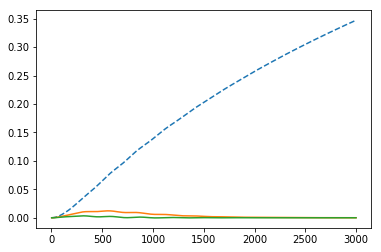

In [20]:
plt.plot(l, clmesh[0, 0], '--')
plt.plot(l, clmesh[0, 1])
plt.plot(l, clmesh[0, 2])
# plt.yscale('log')
# plt.xscale('log')

In [ ]:
fig, axar = plt.subplots(nz, nz, figsize = (25, 25), sharex=True, sharey=True)
lss = ['-', '--', ':', '-.']
lws = [1, 1.5, 1.8, 2]

strng = 'def5'
# for ii, strng in enumerate(['def5', 'test1', 'test2']):
# for ii, strng in enumerate(['baseline', 'baseline2', 'test22', 'test12']):
# for ii, strng in enumerate(['baseline', 'baseline2']):
for ii, strng in enumerate(['baseline8', 'baseline7']):
    cl = np.loadtxt('/global/u1/c/chmodi/Programs/class_public/pborncross/class_%s_cl.dat'%strng)[:, 1:].T
    clmesh = np.zeros((nz, nz, l.size))
    count=0
    for i in range(nz):
        for j in range(i, nz):
            clmesh[i, j, :] = cl[count]
            clmesh[j, i, :] = cl[count]
    #         print(i, j, count)
            count +=1

    for i in range(nz):
        for j in range(nz):
            ax = axar[i, j]
#             ax[i, j].plot(l, abs(clmesh[i, j]), 'C%d%s'%(j%7,lss[ii]), label='%0.2f-%0.2f'%(zzs[i],zzs[j]))
            ax.plot(l, abs(clmesh[i, j]), 'C%d%s'%(j%7,lss[ii]), label=strng, lw=lws[ii])
            ax.set_title('%0.3f-%0.3f'%(zzs[i],zzs[j]))
            ax.semilogy()
            ax.legend()
            ax.grid()
#             ax.set_xlim(0, 1000)


# Setup

In [61]:
runpb = '../data/RunPB/'
runpbpt = '../data/RunPB/PTdata/'
runpbfit = '../data/RunPB_datafit/'
cosmo = Cosmology(pfile='../data/RunPB/pklin_RunPB.txt', M=0.292)
klin, plin = np.loadtxt('../data/RunPB/pklin_RunPB.txt', unpack=True)

In [62]:
cosmo.Dgrow(z=5)**2, cosmo.Dgrow(z=7)**2

(0.04616761149349847, 0.026030263152056973)

In [33]:
# pkhm = np.loadtxt('../data/RunPB_datafit/pkhmz_tab_z200-cleft.txt')
# zzh = np.arange(2-0.25, 2+0.25, 0.01)
pkhm = np.loadtxt('../data/RunPB_datafit/pkhmz_tab_z00-35-b1zhfit.txt')
# pkhm = np.loadtxt('../data/RunPB_datafit/pkhmz_tab_z00-35-b1zlin.txt')
zzh = np.arange(0, 3.5, 0.01)
kkh = pkhm[:, 0]
pkhm = pkhm[:, 1:]
ipkhmz = interp1d(zzh, pkhm , fill_value=0, bounds_error=False)
ikpkhmz = lambda z: (kkh, ipkhmz(z))


pkmm = np.loadtxt('../data/RunPB_datafit/pkmmz_tab_z00-35-lin.txt')
kk = pkmm[:, 0]
pkmm = pkmm[:, 1:]
zzm = np.arange(0,3.5,0.01)
ipkmmz = interp1d(zzm, pkmm , fill_value=0, bounds_error=False)
ikpkmmz = lambda z: (klin, ipkmmz(z))


pkmmcmb = np.loadtxt('../data/RunPB_datafit/pkmmz_tab_z00-1100-lin.txt')
kk = pkmmcmb[:, 0]
pkmmcmb = pkmmcmb[:, 1:]
zzcmb = np.arange(0,1100,1)
ipkmmzcmb = interp1d(zzcmb, pkmmcmb , fill_value=0, bounds_error=False)
ikpkmmzcmb = lambda z: (klin, ipkmmzcmb(z))


pkmmzcleft = PK.PkZCLEFT(0, 3.5, db=runpbpt)
ipkmmzcleft = lambda z: pkmmzcleft([z, 0, 0, 0, 0, 0, 0], auto=False)


ell = np.logspace(0, 3.5, 4000)
lenz = lensingZ.LensingZ(z=None, zmin = 1e-3, zmax= 3.5,  dndz=tools.DnDz().lsst, cosmo=cosmo,  l=ell)

ell2 = np.logspace(0, 3.5, 4000)
ell2 = np.logspace(-2, 3.5, 4000)
z0, dz = 2, 0.5
lenz2 = lensingZ.LensingZ(z0, dndz=tools.DnDz().lsst, cosmo=cosmo, dz=dz, l=ell2)


(1e-06, 0.001)

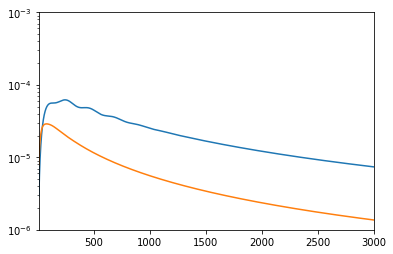

In [6]:
signal2 = lenz2.clz(ikpkhmz, auto=True)
plt.plot(lenz2.l, (2*lenz2.l+1)*signal2/2/np.pi)
signal = lenz.clz(ikpkhmz, auto=True)
plt.plot(lenz.l, (2*lenz.l+1)*signal/2/np.pi)
# plt.loglog()
plt.yscale('log')
plt.xlim(10, 3e3)
plt.ylim(1e-6, 1e-3)

[]

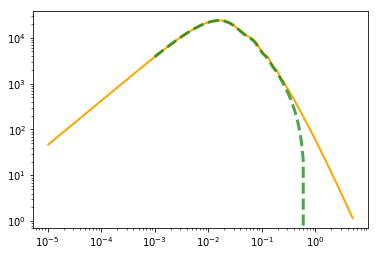

In [7]:
# plt.plot(kk, pkmmzcleft.rsp[:, :, 1:4].sum(axis=-1).T)
z = 0.113
# plt.plot(kk, pkmmzcleft.rsp[int(z*10), :, 1:4].sum(axis=-1).T, 'gray', lw=3, alpha=0.5)
# plt.plot(kk, pkmm[:, int(z*100)])
plt.plot(klin, ipkmmz(z), "orange", lw=2)
plt.plot(*pkmmzcleft([z]), "g--", lw=3, alpha=0.7)
# plt.plot(kk, [p(z) for p in ipz2], ':', color='orange', lw=3)
plt.loglog()

/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/cosmology.py:151: RuntimeWarning: divide by zero encountered in true_divide
  return l/self.xia(a = a)
/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/cosmology.py:151: RuntimeWarning: invalid value encountered in true_divide
  return l/self.xia(a = a)


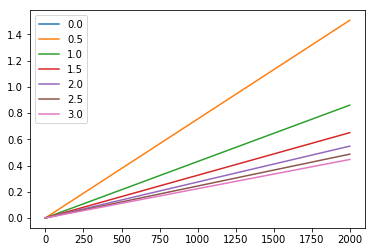

In [8]:
ell = np.linspace(0, 2000)

for z in np.arange(0., 3.5, 0.5):
    plt.plot(ell, cosmo.k_xil(ell, z=z), label=z)
    
plt.legend()

(0.001, 10)

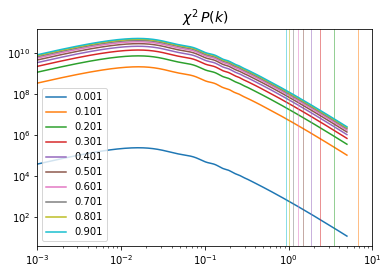

In [9]:
for i, z in enumerate(np.arange(0.001, 1, 0.1)):
#     plt.plot(kk, abs(ipkmmz(z)), 'C%d'%i, label=z)
    plt.plot(kk, cosmo.xia(z=z)**2*abs(ipkmmz(z)), 'C%d'%i, label=z)
    plt.axvline(cosmo.k_xil(2000, z), color= 'C%d'%i, lw=0.5)
plt.loglog()
plt.legend()
plt.title('$\chi^2\, P(k)$', fontsize=14)
plt.xlim(1e-3, 10)

(0.99, 1.01)

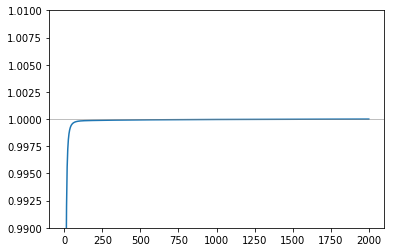

In [10]:
z = 0.01
ell = np.linspace(1, 2000, 1000)
kl = cosmo.k_xil(ell, z)
tmp = np.zeros_like(ell)
for i in range(ell.size):
    kl = cosmo.k_xil(ell[:i], z)
    tmp[i] = np.trapz(np.interp(kl, kk, ipkmmz(z))/ell[:i], ell[:i])
    
plt.plot(ell, tmp/tmp[-1])
# plt.yscale('log')
# plt.xlim(10, 2000)
plt.axhline(1, lw=0.5, color='gray')
plt.ylim(0.99, 1.01)

In [11]:
importlib.reload(lensingZ)


<module 'lensingZ' from '/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/lensingZ.py'>

# Lenz

In [11]:
# ell = np.linspace(1, 5000, 4000)
# ell2 = np.linspace(.01, 5000, 4000)

ell = np.logspace(0, 3.5, 4000)
ell2 = np.logspace(-2, 3.5, 4000)

# lenz = lensingZ.LensingZ(z0, dndz=tools.DnDz().lsst, cosmo=cosmo, dz=dz, l=ell)
lenz = lensingZ.LensingZ(z=None, zmin = 1e-3, zmax= 3.5,  dndz=tools.DnDz().lsst, cosmo=cosmo,  l=ell)

z0, dz = 2, 1.8
lenz2 = lensingZ.LensingZ(z0, dndz=tools.DnDz().lsst, cosmo=cosmo, dz=dz, l=ell2)


In [12]:
# pborn = lenz.clkg31d(ikpkhmz, ikpkmmz)
# pborn2 = lenz2.clkg31d(ikpkhmz, ikpkmmz)
# plt.plot(lenz.l, pborn)
# plt.plot(lenz.l, pborn2, '--')
# plt.plot(lenz.l, lenz.clz(ikpkhmz, auto=False))
# plt.loglog()
# plt.xlim(10, 3000)
# plt.ylim(1e-12, 1e-6)


In [72]:
zz = np.linspace(0.01, z0+dz, 5)
internal = np.array([lenz.clkg31d_internal(i, ikpkmmz) for i in zz])
internal2 = np.array([lenz2.clkg31d_internal(i, ikpkmmz) for i in zz])


/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/cosmology.py:151: RuntimeWarning: divide by zero encountered in true_divide
  return l/self.xia(a = a)


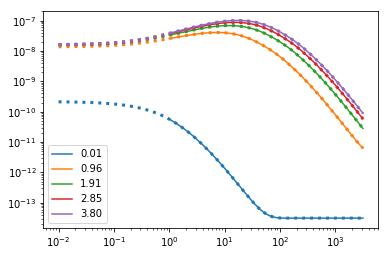

In [73]:
for i in range(len(zz)):
    plt.plot(ell, internal[i], 'C%d'%i, label='%0.2f'%zz[i])
    plt.plot(ell2, internal2[i],'C%d:'%i, lw=3, alpha=1) 
plt.loglog()
plt.legend()

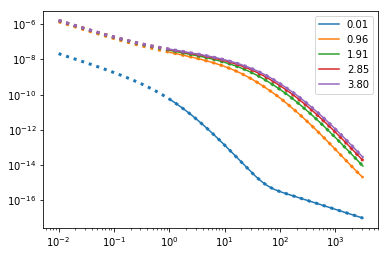

In [74]:
for i in range(len(zz)):
    plt.plot(ell, internal[i]/ell, 'C%d'%i, label='%0.2f'%zz[i])
    plt.plot(ell2, internal2[i]/ell2,'C%d:'%i, lw=3, alpha=1) 
plt.loglog()
plt.legend()

In [75]:
# np.trapz(internal/ell, ell)/np.trapz(internal2/ell2, ell2)

[]

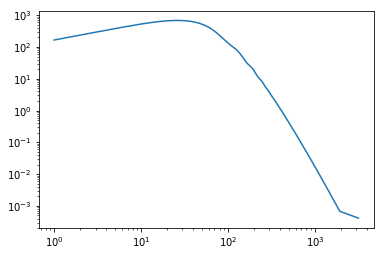

In [76]:
zt = 0.01
kt = cosmo.k_xil(lenz2.l, 0.1)
plt.plot(ell, np.interp(kt, *ikpkmmz(zt))/ell)
# plt.plot(ell, np.interp(kt, *ikpkmmz(zt)))
plt.loglog()

In [77]:
from scipy.interpolate import UnivariateSpline as uspline


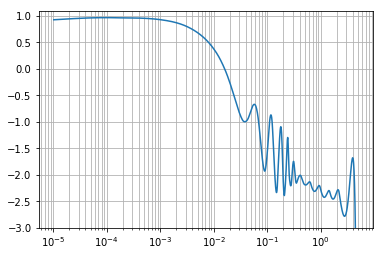

In [78]:
upklin = uspline(klin, plin)
plt.plot(klin, upklin.derivative(1)(klin)*klin/plin)
plt.xscale('log')
plt.ylim(-3, 1.1)
plt.grid(which='both')

In [ ]:
def clkg31d_internal(self, z, ipkmz):
    zz = np.linspace(0, z, 100)
    kercmb = self.kernel_cmb_noxi(z = zz, zcmb = z)
    xis = self.cosmo.xia(z = zz)
    #kerwt = kercmb / xis**2                                                                                                            
    #since xis goes to 0, cancel this xis with xis in integral                                                                          
    #and use kercmb instead of kercmbwt                                                                                                 
    pval = np.zeros([self.l.size, zz.size])

    for foo in range(zz.size):
        if self.purelimber:
            kk = self.cosmo.k_xil(self.l, z = zz[foo])
        else:
            kk = self.cosmo.k_xil(self.l + 0.5, z = zz[foo])
        kp = ipkmz(z = zz[foo])
        pval[:, foo] = numpy.interp(kk, *kp)

    #return np.trapz(pval*kerwt**2*xis**2, xis, axis=-1)                                                                                
    return np.trapz(pval*kercmb**2, xis, axis=-1)

def clkg31d(self, ipkhz, ipkmz):

    intfac = np.array([self.clkg31d_internal(z, ipkmz) for z in self.zs])
    intfac = np.trapz(intfac/self.l, self.l, axis=-1)

    pval = numpy.zeros_like(self.kmesh)
    for foo in range(self.nz):
        kp = ipkhz(z = self.zs[foo])
        pval[:, foo] = numpy.interp(self.kmesh[:, foo], *kp)

    integrand = pval*self.kgwts*intfac
    return np.trapz(integrand, self.xis, axis=-1) *self.l**2/2/np.pi
    #return integrand, intfac                                                                                                           


# def firstterm_chi(z, ipkz 
def firstterm_chip(z, ipkmz, ellp, lenz,):
    zz = np.linspace(0, z, 100)
    kercmb = lenz.kernel_cmb_noxi(z = zz, zcmb = z)
    xis = lenz.cosmo.xia(z = zz)
    #kerwt = kercmb / xis**2                                                                                                            
    #since xis goes to 0, cancel this xis with xis in integral                                                                          
    #and use kercmb instead of kercmbwt                                                                                                 
    pval = np.zeros([ellp.size, zz.size])

    for foo in range(zz.size):
        kk = lenz.cosmo.k_xil(ellp, z = zz[foo])
        #kk = lenz.cosmo.k_xil(ell + 0.5, z = zz[foo])
        kp = ipkmz(z = zz[foo])
        pval[:, foo] = numpy.interp(kk, *kp)

    #return np.trapz(pval*kerwt**2*xis**2, xis, axis=-1)                                                                                
    return np.trapz(pval*kercmb**2, xis, axis=-1)



def firstterm_chi(ipkmhz, ipkmz, ell, ellp, cosphi):
    l2 = (ell**2 + ellp**2 - 2*ell*ellp*cosphi)**0.5
    pass



# Setup M

In [103]:

def setupMold(ipklz, ipklpz, zmax, lenz, ell, zmin=1e-3, nz=100, ellp=None, auto=False):

    zint = np.linspace(zmin, zmax, nz)
    xiint = lenz.cosmo.xia(z = zint)
    kercmb = lenz.kernel_cmb(z = zint)
    kerg = lenz.kernel_g(z=zint, dndz=lenz.dndz)
    if auto:
        outkerfac = kercmb * kercmb / xiint**2 #THIS IS CORRECT
    else:
        outkerfac = kercmb * kerg / xiint**2 #THIS IS CORRECT
    print(outkerfac.shape)

    def xip_integral(z, ipklpz, ellp, lenz, zmin=1e-3, nz=nz):
        zz = np.linspace(zmin, z, nz)
        kercmb_noxi = lenz.kernel_cmb_noxi(z = zz, zcmb = z)
        xis = lenz.cosmo.xia(z = zz)
        #kerwt = kercmb / xis**2                                                                                                            
        #since xis goes to 0, cancel this xis with xis in integral                                                                          
        #and use kercmb instead of kercmbwt                                                                                                 
        pval = np.zeros([ellp.size, zz.size])

        for foo in range(zz.size):
#             kk = lenz.cosmo.k_xil(ellp, z = zz[foo])
            kk = lenz.cosmo.k_xil(ellp + 0.5, z = zz[foo])
            kp = ipklpz(z = zz[foo])
#             pval[:, foo] = numpy.interp(kk, *kp) / ellp**4 
            pval[:, foo] = numpy.interp(kk, *kp) 

        return np.trapz(pval*kercmb_noxi**2, xis, axis=-1)

    intfac = np.array([xip_integral(z, ipklpz, ell, lenz, zmin=zmin) for z in zint])
    print(intfac.shape)
    
    pval = numpy.zeros([ell.size, zint.size])
    for foo in range(nz):
#         kk = lenz.cosmo.k_xil(ell, z = zint[foo])
        kk = lenz.cosmo.k_xil(ell + 0.5, z = zint[foo])
        kp = ipklz(z = zint[foo])
#         pval[:, foo] = numpy.interp(kk, *kp)/ell**2
        pval[:, foo] = numpy.interp(kk, *kp)

    integrand = pval*outkerfac
    print(integrand.shape)
    
    M = integrand[:, :, None]*intfac
    M = np.trapz(M, xiint, axis=1)
    return M



In [34]:
# ellm = np.concatenate((np.logspace(-5, 1, 2000), np.linspace(10, 10000, 2000)))

lmax = 5000
acc=2
ellm = np.hstack((np.arange(2, 400, 1), np.arange(401, 2600, 10//acc),np.arange(2650, lmax, 50//acc),np.arange(lmax,lmax+1))).astype(np.float64)
# ellm = np.hstack((np.logspace(-4, 0, 500), np.arange(1.02, 10, 0.1) ,np.arange(10, 100, 0.2) , np.arange(100, 200, 0.5), np.arange(200, 1000, 1),
#                   np.arange(1000, lmax, 5) , np.arange(lmax, lmax+1, 1))).astype(np.float64)
# ellm2 = np.concatenate((np.logspace(-3, 1, 2000), np.linspace(10, 4000, 2000)))
ellm2 = np.logspace(-3, 3.5, 4000)
# ellm = np.arange(1e-1, 20, 1)

nz = 50 
M = setupM(ikpkmmz, ikpkmmz, zmax=3.5, lenz=lenz, ell=ellm, nz=nz)
M2 = setupM(ikpkmmz, ikpkmmz, zmax=3.5, lenz=lenz, ell=ellm2, nz=nz)

interps = [interp1d(ellm, M[:, i], fill_value=0, bounds_error=False) for i in range(ellm.size)]

kerg normalization =  1.0
Cross factor
(50,)
(50, 933)
(933, 50)
kerg normalization =  1.0
Cross factor
(50,)
(50, 4000)
(4000, 50)


KeyboardInterrupt: 

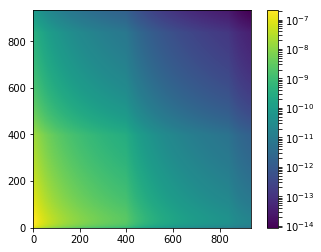

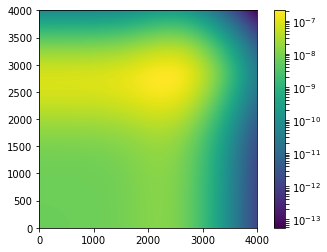

In [168]:
im = plt.imshow(M, norm=LogNorm(), origin='lower')
plt.colorbar(im)
plt.show()
im = plt.imshow(M2, norm=LogNorm(), origin='lower')
plt.colorbar(im)
plt.show()

9 2461


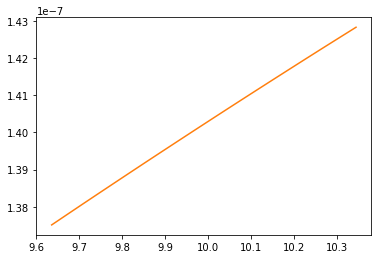

In [169]:
testl = 10
ii, ii2 = np.where(ellm > testl)[0][0], np.where(ellm2 > testl)[0][0]
print(ii, ii2)
# plt.plot(ellm, M[:, ii])
# plt.plot(ellm2, M2[:, ii2])

di = 10
plt.plot(ellm[ii-di:ii+di], M[ii-di:ii+di, ii], '.')
plt.plot(ellm2[ii2-di:ii2+di], M2[ii2-di:ii2+di,  ii2])
# plt.loglog()

(-10, 10)

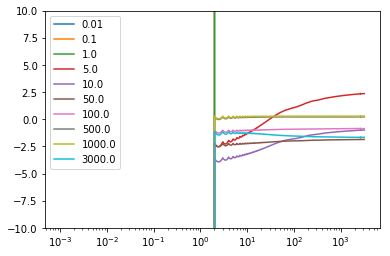

In [177]:
for testl in [1e-2, 1e-1, 1e0, 5e0, 1e1, 5e1, 1e2, 5e2, 1e3, 3e3]:
    try:
        ii, ii2 = np.where(ellm > testl)[0][0], np.where(ellm2 > testl)[0][0]
#         plt.plot(ellm2, 100*(np.interp(ellm2, ellm, M[:, ii])/M2[:, ii2]-1), label=testl)
        plt.plot(ellm2, 100*(interp1d(ellm, M[:, ii], fill_value=0, bounds_error=False)(ellm2)/M2[:, ii2]-1), label=testl)
#         plt.plot(ellm2, 100*(10**interp1d(ellm, np.log10(M[:, ii]), fill_value=0, bounds_error=False)(ellm2)/M2[:, ii2]-1), label=testl)
    
    except Exception as e:
        print(testl, e)
#     plt.plot(ellm2, 100*(10**np.interp(np.log10(ellm2), np.log10(ellm), np.log10(M[:, ii]))/M2[:, ii2]-1), label=testl)

plt.legend()
plt.xscale('log')
plt.ylim(-10, 10)

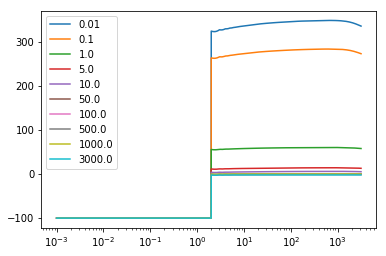

In [179]:

for testl in [1e-2, 1e-1, 1e0, 5e0, 1e1, 5e1, 1e2, 5e2, 1e3, 3e3]:
    ii, ii2 = np.where(ellm > testl)[0][0], np.where(ellm2 > testl)[0][0]
    plt.plot(ellm2, 100*(interp1d( ellm, M[ii, :], fill_value=0, bounds_error=False)(ellm2)/M2[ii2, :]-1), label=testl)
#     plt.plot(ellm2, 100*(10**np.interp(np.log10(ellm2), np.log10(ellm), np.log10(M[:, ii]))/M2[:, ii2]-1), label=testl)

plt.legend()
plt.xscale('log')

In [21]:
# from scipy.interpolate import interp2d
# interp2d(ell, ell, M)

# AAngular


In [46]:

def setupM(ipklz, ipklpz, zmax, lenz, ell, zmin=1e-3, nz=100, ellp=None, auto=False):

    zint = np.linspace(zmin, zmax, nz)
    xiint = lenz.cosmo.xia(z = zint)
    kercmb = lenz.kernel_cmb(z = zint)
    kerg = lenz.kernel_g(z=zint, dndz=lenz.dndz, norm=True)
    print('kerg normalization = ',  np.trapz(kerg, xiint))
    if auto:
        outkerfac = kercmb * kercmb / xiint**2 #THIS IS CORRECT
    else:
        print('Cross factor')
        outkerfac = kercmb * kerg / xiint**2 #THIS IS CORRECT
    print(outkerfac.shape)

    def xip_integral(z, ipklpz, ellp, lenz, zmin=1e-3, nz=nz):
        zz = np.linspace(zmin, z, nz)
        kercmb_noxi = lenz.kernel_cmb_noxi(z = zz, zcmb = z)
        xis = lenz.cosmo.xia(z = zz)
        #kerwt = kercmb / xis**2                                                                                                            
        #since xis goes to 0, cancel this xis with xis in integral                                                                          
        #and use kercmb instead of kercmbwt                                                                                                 
        pval = np.zeros([ellp.size, zz.size])

        for foo in range(zz.size):
            kk = lenz.cosmo.k_xil(ellp, z = zz[foo])
#             kk = lenz.cosmo.k_xil(ellp + 0.5, z = zz[foo])
            kp = ipklpz(z = zz[foo])
            pval[:, foo] = numpy.interp(kk, *kp) 

        return np.trapz(pval*kercmb_noxi**2, xis, axis=-1)

    intfac = np.array([xip_integral(z, ipklpz, ell, lenz, zmin=zmin) for z in zint])
    print(intfac.shape)
    
    pval = numpy.zeros([ell.size, zint.size])
    for foo in range(nz):
        kk = lenz.cosmo.k_xil(ell, z = zint[foo])
#         kk = lenz.cosmo.k_xil(ell + 0.5, z = zint[foo])
        kp = ipklz(z = zint[foo])
        pval[:, foo] = numpy.interp(kk, *kp)

    integrand = pval*outkerfac
    print(integrand.shape)
    
    M = integrand[:, :, None]*intfac
    M = np.trapz(M, xiint, axis=1)
    return M



def setupMdiffauto(iM, l0,  ell, cosphis, ellmax=None, ellmin=None):
    l2 = (l0**2 + ell.reshape(-1, 1)**2 + 2*ell.reshape(-1, 1)*l0*cosphis.reshape(1, -1))**0.5

    mll = np.array([iM(l2[i, :], ell[i], grid=False) for i in range(ell.size)])
    mll2 = iM(l0, ell)
    mlldiff = mll/l2**4/ell.reshape(-1, 1)**4 - (mll2/l0**4/ell**4).reshape(-1, 1)
    if ellmax is not None and ellmin is not None:
        mask = ((l2 > ellmax) | (l2 < ellmin))        
        mlldiff[mask] = 0 
    
    return mlldiff



def setupMdiffcross(iM, l0, ell, cosphis, ellmax=None, ellmin=None):
    l2 = (l0**2 + ell.reshape(-1, 1)**2 + 2*ell.reshape(-1, 1)*l0*cosphis.reshape(1, -1))**0.5

    mll = np.array([iM(l2[i, :], ell[i], grid=False) for i in range(ell.size)])
    mll2 = iM(l0, ell)
    mlldiff = mll/l2**2/ell.reshape(-1, 1)**4 - (mll2/l0**2/ell**4).reshape(-1, 1)
    if ellmax is not None and ellmin is not None:
        mask = ((l2 > ellmax) | (l2 < ellmin))        
        mlldiff[mask] = 0 
    
    return mlldiff

    



In [47]:
lenz = lensingZ.LensingZ(z=None, zmin = 1e-3, zmax= 3.5,  nz=100, dndz=tools.DnDz().lsst, cosmo=cosmo,  l=ell)
lenzcmb = lensingZ.LensingZ(z=None, zmin = 1e-3, zmax= 1100,  nz=1000, dndz=tools.DnDz().lsst, cosmo=cosmo,  l=ell)
phis = np.linspace(0, 2*np.pi, 1000, endpoint=True)
cosphis = np.cos(phis)
cosphisT = cosphis.reshape(-1, 1)

lmax = 5000
acc=2
# ellm = np.hstack((np.arange(2, 400, 1), np.arange(401, 2600, 10//acc),np.arange(2650, lmax, 50//acc),np.arange(lmax,lmax+1))).astype(np.float64)
ellm = np.hstack((np.logspace(-4, 0, 500), np.arange(1.02, 10, 0.1) ,np.arange(10, 100, 0.2) , np.arange(100, 200, 0.5), np.arange(200, 1000, 1),
                  np.arange(1000, lmax, 5) , np.arange(lmax, lmax+1, 1))).astype(np.float64)
# ellm = np.hstack((np.logspace(-4, 0, 1000), np.arange(1.02, 10, 0.1) ,np.arange(10, 100, 0.2) , np.arange(100, 200, 0.5), np.arange(200, lmax, 1))).astype(np.float64)
nz = 200

M = setupM(ikpkmmzcmb, ikpkmmzcmb, zmax=1100, lenz=lenzcmb, ell=ellm, nz=nz, auto=True)
Mx = setupM(ikpkhmz, ikpkmmz, zmax=3.5, lenz=lenz, ell=ellm, nz=nz, auto=False)

kerg normalization =  1.0
(200,)
(200, 2841)
(2841, 200)
kerg normalization =  1.0
Cross factor
(200,)
(200, 2841)
(2841, 200)


In [48]:
iM = RectBivariateSpline(ellm, ellm, M)
iMx = RectBivariateSpline(ellm, ellm, Mx)

# with open('M_auto.pkl', 'wb') as f:
#     pickle.dump(iM, f)
# with open('M_cross_b1lin.pkl', 'wb') as f:
#     pickle.dump(iMx, f)


In [38]:
import pickle

# with open('M_matrix.pkl', 'rb') as f:
#     tmp = pickle.load(f)
    
with open('M_matrix.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    iMv = u.load()
    print(iMv)
    


## Auto

[]

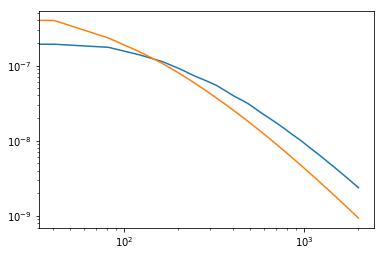

In [13]:
test = np.loadtxt('../data/RunPB/class_output/RunPB00_cl_lensed.dat').T
# plt.plot(test[0], (test[0]*(test[0]+1))**2/4*test[5])
# plt.plot(test[0], test[5])
signal = lenzcmb.clz(ikpkmmzcmb, auto='cmb')
plt.plot(lenzcmb.l, signal)
signal = lenz.clz(ikpkmmz, auto=False)
plt.plot(lenz.l, signal)
plt.loglog()

In [150]:
ell = np.hstack((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 3000, 50)))
# ellp = np.hstack((np.arange(2, 400, 1), np.arange(401, 2600, 10//acc),np.arange(2650, lmax, 50//acc),np.arange(lmax,lmax+1))).astype(np.float64)
ellp = np.hstack((np.logspace(-3, 0, 200), np.arange(1.02, 10, 0.2) , np.arange(10, 100, 0.5) , np.arange(100, 200, 2), np.arange(200, 1000, 10),
                  np.arange(1000, lmax, 50) , np.arange(lmax, lmax+1, 1))).astype(np.float64)

ellp=np.logspace(-1,4, 400)
print(ellp.size)
# ellp = ellm 
ellmax, ellmin = ellp[-1], ellp[0]


firstterm = []

for ii, l0 in enumerate(ell):
    mlldiff = setupMdiffauto(iM, l0, ellp, cosphis, ellmax=None, ellmin=None)
    c0 = np.trapz(np.trapz(mlldiff,  phis)*(l0**2*ellp**2) * ellp**3, ellp)
    c1 = np.trapz(np.trapz(mlldiff*cosphis,  phis)*(2*l0*ellp**3 + 2*l0**3*ellp) * ellp**3, ellp)
    c2 = np.trapz(np.trapz(mlldiff*cosphis**2,  phis)*(ellp**4 + l0**4 + 4*l0**2*ellp**2) * ellp**3,ellp)
    c3 = np.trapz(np.trapz(mlldiff*cosphis**3,  phis)*(2*l0*ellp**3 + 2*l0**3*ellp) * ellp**3, ellp)
    c4 = np.trapz(np.trapz(mlldiff*cosphis**4,  phis)*(l0**2*ellp**2)  * ellp**3, ellp)

    firstterm.append([c0, c1, c2, c3, c4])


firstterm = np.array(firstterm)
firstterm *= ell.reshape(-1, 1)**2 /np.pi**2



secondterm = []
for l0 in ell:
    ml = iM(l0, ellp)/l0**4/ellp**4
#     ml = M[ii, :]/l0**4/ellp**4
    c0 = np.trapz(ml*np.trapz(1 + phis*0,  phis)*(l0**2*ellp**2) * ellp**3, ellp)
    c1 = np.trapz(ml*np.trapz(cosphis,  phis)*(2*l0*ellp**3 + 2*l0**3*ellp) * ellp**3, ellp)
    c2 = np.trapz(ml*np.trapz(cosphis**2,  phis)*(ellp**4 +  4*l0**2*ellp**2) * ellp**3,ellp)
    c3 = np.trapz(ml*np.trapz(cosphis**3,  phis)*(2*l0*ellp**3 + 2*l0**3*ellp) * ellp**3, ellp)
    c4 = np.trapz(ml*np.trapz(cosphis**4,  phis)*(l0**2*ellp**2)  * ellp**3, ellp)

    secondterm.append([c0, c1, c2, c3, c4])

secondterm = np.array(secondterm).reshape(-1, 5)
secondterm *= ell.reshape(-1, 1)**2 /np.pi**2

400


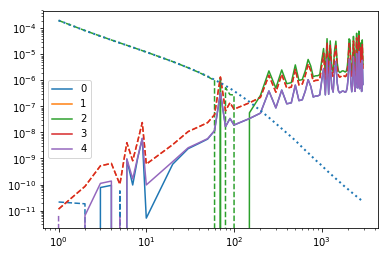

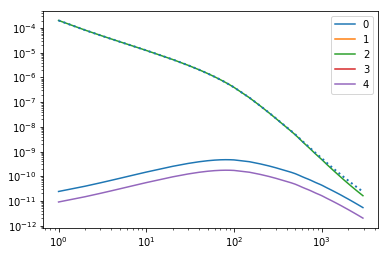

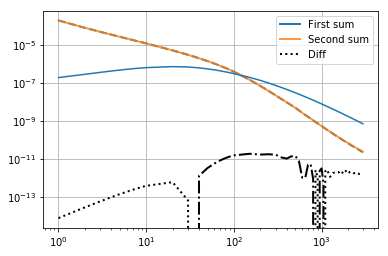

In [151]:
for i in range(5):
    plt.plot(ell, (firstterm[:, i]), 'C%d'%i, label=i)
    plt.plot(ell, -(firstterm[:, i]), 'C%d--'%i)
plt.plot(ell, abs(firstterm.sum(axis=-1)), ':', lw=2)

plt.legend()
plt.loglog()
plt.show()



for i in range(5):
    plt.plot(ell, (secondterm[:, i]), 'C%d'%i, label=i)
#     plt.plot(ell, -(secondterm[:, i]), 'C%d--'%i)
plt.plot(ell, abs(secondterm.sum(axis=-1)), ':', lw=2)

plt.legend()
plt.loglog()
plt.show()



plt.plot(ell, firstterm.sum(axis=-1), 'C0-', lw=2, label='First sum')
plt.plot(ell, -firstterm.sum(axis=-1), 'C0--', lw=2)
plt.plot(ell, secondterm.sum(axis=-1), 'C1-', lw=2, alpha=0.8, label='Second sum')
plt.plot(ell, -secondterm.sum(axis=-1), 'C1--', lw=2, alpha=0.8)

plt.plot(ell, 1*(firstterm+secondterm).sum(axis=-1), 'k:', lw=2, label='Diff')
plt.plot(ell, -1*(firstterm+secondterm).sum(axis=-1), 'k-.', lw=2)

signal = lenz.clz(ikpkhmz, auto=False)
plt.plot(lenz.l, signal)
plt.legend()
plt.grid()
plt.legend()
plt.loglog()
# plt.savefig('pborn.pdf')
plt.show()


In [152]:
lmax = 10000
ell = np.hstack((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 3000, 50)))
# ellp = np.hstack((np.arange(2, 400, 1), np.arange(401, 2600, 10//acc),np.arange(2650, lmax, 50//acc),np.arange(lmax,lmax+1))).astype(np.float64)
ellp = np.hstack((np.logspace(-3, 0, 200), np.arange(1.02, 10, 0.2) , np.arange(10, 100, 0.5) , np.arange(100, 200, 2), np.arange(200, 1000, 10),
                  np.arange(1000, lmax, 50) , np.arange(lmax, lmax+1, 1))).astype(np.float64)

ellp=np.logspace(-2, 4, 500)
print(ellp.size)
ellmax, ellmin = ellp[-1], ellp[0]

##############
firsttermall = []

for ii, l0 in enumerate(ell):
#     mlldiff = setupMdiffauto(iM, l0,  ellp, cosphis, ellmax, ellmin)
    mlldiff = setupMdiffauto(iM, l0, ellp, cosphis, ellmax=None, ellmin=None)

    integrand = (ellp**2 *l0**2 * (l0 + ellp*cosphisT)**2 * (l0*cosphisT + ellp)**2).T
    firsttermall.append(np.trapz(np.trapz(integrand*mlldiff, phis)*ellp, ellp))


firsttermall = np.array(firsttermall)
firsttermall *= 1 /np.pi**2


secondtermall = []
for l0 in ell:
    ml = iM(l0, ellp)/l0**4/ellp**4
    integrand =  (ellp**2 *l0**2 * (l0 + ellp*cosphisT)**2 * (l0*cosphisT + ellp)**2).T
    integrand -= (l0**4 * (l0 * ellp*cosphisT)**2 ).T
    secondtermall.append(np.trapz(np.trapz(integrand, phis)*ml*ellp, ellp))

secondtermall = np.array(secondtermall).reshape(-1)
secondtermall *= 1 /np.pi**2


500


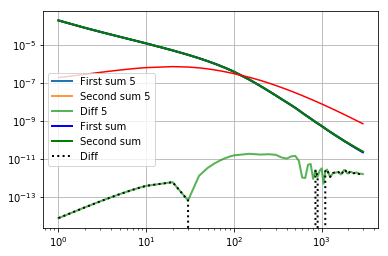

In [153]:
try:
    plt.plot(ell, abs(firstterm.sum(axis=-1)), 'C0-', lw=2, label='First sum 5')
    plt.plot(ell, abs(secondterm.sum(axis=-1)), 'C1-', lw=2, alpha=0.8, label='Second sum 5')
    plt.plot(ell, abs(firstterm.sum(axis=-1)+secondterm.sum(axis=-1)), 'C2-', lw=2, alpha=0.8, label='Diff 5')
except Exception as e:
    print(e)
    
plt.plot(ell, abs(firsttermall), 'b', lw=2, label='First sum')
plt.plot(ell, abs(secondtermall), 'g', lw=2, label='Second sum')
plt.plot(ell, (firsttermall+secondtermall), 'k:', lw=2, label='Diff')
signal = lenz.clz(ikpkhmz, auto=False)
plt.plot(lenz.l, signal, 'r')
plt.legend()
plt.grid()
plt.legend()
plt.loglog()
# plt.savefig('pborn.pdf')
plt.show()


## Cross

[]

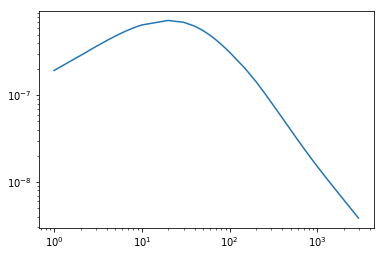

In [49]:
signalx = lenz.clz(ikpkhmz, auto=False)
plt.plot(lenz.l, signalx)
plt.loglog()

In [50]:
ell = np.hstack((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 3000, 50)))
# ellp = np.hstack((np.arange(2, 400, 1), np.arange(401, 2600, 10//acc),np.arange(2650, lmax, 50//acc),np.arange(lmax,lmax+1))).astype(np.float64)
ellp = np.hstack((np.logspace(-4, 0, 500), np.arange(1.02, 10, 0.1) ,np.arange(10, 100, 0.2) , np.arange(100, 200, 0.5), np.arange(200, 1000, 1),
                  np.arange(1000, lmax, 5) , np.arange(lmax, lmax+1, 1))).astype(np.float64)


ellp=np.logspace(-1, 5, 400)
print(ellp.size)
ellmax, ellmin = ellp[-1], ellp[0]


firsttermx = []

for ii, l0 in enumerate(ell):
    mlldiff = setupMdiffcross(iMx, l0, ellp, cosphis, ellmax=None, ellmin=None)
    
    c0 = simps(np.trapz(mlldiff,  phis) *(l0**1*ellp**2) * ellp**3, ellp)
    c1 = simps(np.trapz(mlldiff*cosphis,  phis)*(ellp**3 + 2*l0**2*ellp) * ellp**3, ellp)
    c2 = simps(np.trapz(mlldiff*cosphis**2,  phis)*(l0**3 + 2*l0*ellp**2) * ellp**3,ellp)
    c3 = simps(np.trapz(mlldiff*cosphis**3,  phis)*(l0**2*ellp) * ellp**3, ellp)    

    firsttermx.append([c0, c1, c2, c3])

firsttermx = np.array(firsttermx)
firsttermx *= ell.reshape(-1, 1)**1 /np.pi**2



secondtermx = []
for l0 in ell:
    ml = iMx(l0, ellp)/l0**2/ellp**4
#     ml = M[ii, :]/l0**4/ellp**4
    c0 = np.trapz(np.trapz(1 + phis*0,  phis) *(l0**1*ellp**2) *ml * ellp**3, ellp)
    c1 = np.trapz(np.trapz(1*cosphis,  phis)*(ellp**3 + 2*l0**2*ellp)*ml  * ellp**3, ellp)
    c2 = np.trapz(np.trapz(1*cosphis**2,  phis)*(2*l0*ellp**2) *ml * ellp**3,ellp)
    c3 = np.trapz(np.trapz(1*cosphis**3,  phis)*(l0**2*ellp) *ml * ellp**3, ellp)    

    secondtermx.append([c0, c1, c2, c3])

secondtermx = np.array(secondtermx).reshape(-1, 4)
secondtermx *= ell.reshape(-1, 1)**1 /np.pi**2

400


In [51]:
ell = np.hstack((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 3000, 50)))
# ellp = np.hstack((np.arange(2, 400, 1), np.arange(401, 2600, 10//acc),np.arange(2650, lmax, 50//acc),np.arange(lmax,lmax+1))).astype(np.float64)
ellp = np.hstack((np.logspace(-4, 0, 500), np.arange(1.02, 10, 0.1) ,np.arange(10, 100, 0.2) , np.arange(100, 200, 0.5), np.arange(200, 1000, 1),
                  np.arange(1000, lmax, 5) , np.arange(lmax, lmax+1, 1))).astype(np.float64)


ellp=np.logspace(-1,6, 400)
print(ellp.size)
ellmax, ellmin = ellp[-1], ellp[0]

firsttermxall = []

for ii, l0 in enumerate(ell):
#     mlldiff = setupMdiffauto(iM, l0,  ellp, cosphis, ellmax, ellmin)
    mlldiff = setupMdiffcross(iMx, l0, ellp, cosphis, ellmax=None, ellmin=None)        
    integrand = (ellp**2 *l0**1 * (l0 + ellp*cosphisT)**1 * (l0*cosphisT + ellp)**2).T
    firsttermxall.append(np.trapz(np.trapz(integrand*mlldiff, phis)*ellp, ellp))

firsttermxall = np.array(firsttermxall)
firsttermxall *= 1 /np.pi**2


secondtermxall = []
for l0 in ell:
    ml = iMx(l0, ellp)/l0**2/ellp**4
    integrand = (ellp**2 *l0**1 * (l0 + ellp*cosphisT)**1 * (l0*cosphisT + ellp)**2).T
    integrand -=  (l0**2 * (l0 * ellp*cosphisT)**2) .T
    secondtermxall.append(np.trapz(np.trapz(integrand, phis)*ml*ellp, ellp))

secondtermxall = np.array(secondtermxall).reshape(-1)
secondtermxall *= 1 /np.pi**2


400


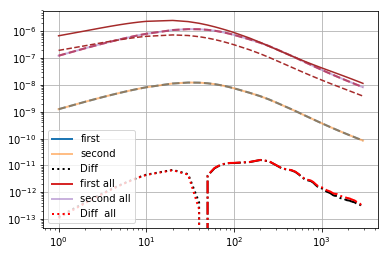

In [52]:
plt.plot(ell, firsttermx.sum(axis=-1), 'C0-', lw=2, label='first')
plt.plot(ell, -firsttermx.sum(axis=-1), 'C0--', lw=2)
plt.plot(ell, secondtermx.sum(axis=-1), 'C1-', lw=2, alpha=0.5,  label='second')
plt.plot(ell, -secondtermx.sum(axis=-1), 'C1--', lw=2, alpha=0.5, )

plt.plot(ell, 4*(firsttermx+secondtermx).sum(axis=-1), 'k:', lw=2, label='Diff')
plt.plot(ell, -4*(firsttermx+secondtermx).sum(axis=-1), 'k-.', lw=2)


plt.plot(ell, firsttermxall, 'C3-', lw=2, label='first all')
plt.plot(ell, -firsttermxall, 'C3--', lw=2)
plt.plot(ell, secondtermxall, 'C4-', lw=2, alpha=0.5, label='second all')
plt.plot(ell, -secondtermxall, 'C4--', lw=2, alpha=0.5, )

plt.plot(ell, 4*(firsttermxall+secondtermxall), 'r:', lw=2, label='Diff  all')
plt.plot(ell, -4*(firsttermxall+secondtermxall), 'r-.', lw=2)

signal = lenz.clz(ikpkhmz, auto=True)
plt.plot(lenz.l, signal, 'brown')
signal = lenz.clz(ikpkhmz, auto=False)
plt.plot(lenz.l, signal, '--', color='brown')

plt.grid()
plt.legend()
plt.loglog()
plt.show()

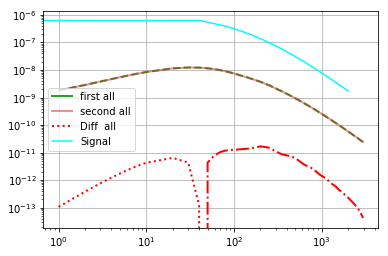

In [32]:
# plt.plot(ell, firsttermx.sum(axis=-1), 'C0-', lw=2, label='first')
# plt.plot(ell, -firsttermx.sum(axis=-1), 'C0--', lw=2)
# plt.plot(ell, secondtermx.sum(axis=-1), 'C1-', lw=2, alpha=0.5,  label='second')
# plt.plot(ell, -secondtermx.sum(axis=-1), 'C1--', lw=2, alpha=0.5, )

# plt.plot(ell, 4*(firsttermx+secondtermx).sum(axis=-1), 'k:', lw=2, label='Diff')
# plt.plot(ell, -4*(firsttermx+secondtermx).sum(axis=-1), 'k-.', lw=2)


plt.plot(ell, firsttermxall, 'C2-', lw=2, label='first all')
plt.plot(ell, -firsttermxall, 'C2--', lw=2)
plt.plot(ell, secondtermxall, 'C3-', lw=2, alpha=0.5, label='second all')
plt.plot(ell, -secondtermxall, 'C4--', lw=2, alpha=0.5, )

plt.plot(ell, 4*(firsttermxall+secondtermxall), 'r:', lw=2, label='Diff  all')
plt.plot(ell, -4*(firsttermxall+secondtermxall), 'r-.', lw=2)

signal = lenz.clz(ikpkhmz, auto=False)
plt.plot(lenz.l, signal, 'cyan', label='Signal')

plt.grid()

plt.legend()
plt.loglog()
# plt.savefig('pborncross.pdf')
plt.show()

# V numbers

In [27]:
import pickle

# with open('M_matrix.pkl', 'rb') as f:
#     tmp = pickle.load(f)
    
with open('M_matrix.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    iMv = u.load()
    print(iMv)

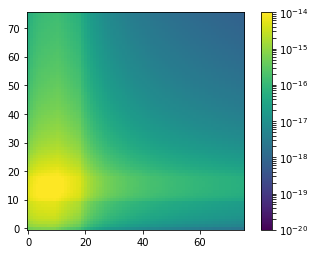

In [31]:
im = plt.imshow(iMv(ell, ell), norm=LogNorm(),  origin='lower', vmin=1e-20, vmax=1e-14)
plt.colorbar(im)

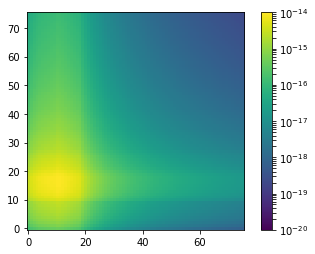

In [32]:
im = plt.imshow(iM(ell, ell), norm=LogNorm(),  origin='lower', vmin=1e-20, vmax=1e-14)
plt.colorbar(im)

In [35]:
#compute correction following Krause&Hirata
def get_regularized_sum_of_terms(L,L1,phi,M,method='trapz'):
    nu = np.cos(phi)
    res=[]
    for LL in L:
        resL1=[]
        for LL1 in L1:
            L_= LL*np.sqrt(1.+(LL1/LL)**2+2.*LL1/LL*nu)
            integrand =LL**2*LL1**3*(LL1*nu+LL)**2*(LL1+LL*nu)**2*(M(L_,LL1,grid=False)/L_**4/LL1**4-M(LL,LL1,grid=False)/LL**4/LL1**4)
            if method =='simps':
                resL1+=[simps(integrand,phi)]
            elif method =='trapz':
                resL1+=[np.trapz(integrand,phi)]
            elif method =='sum':
                resL1+=[np.sum(integrand*np.diff(phi)[0])]
        res+=[simps(resL1,L1)]
    res=4.*np.asarray(res)/(2*np.pi)**2
    return res

def get_second_sum_of_terms(L,L1,M,method='trapz'):
    nu = np.cos(phi)
    res=[]
    for LL in L:
        resL1=[]
        for LL1 in L1:
            integrand = LL1*(LL**2*LL1**2*(LL1*nu+LL)**2*(LL1+LL*nu)**2-LL**4*(LL*LL1*nu)**2)*(M(LL,LL1,grid=False)/LL**4/LL1**4)
            if method =='simps':
                resL1+=[simps(integrand,phi)]
            elif method =='trapz':
                resL1+=[np.trapz(integrand,phi)]
            elif method =='sum':
                resL1+=[np.sum(integrand*np.diff(phi)[0])]
        val = simps(resL1,L1)
        res+=[val]
    res=4.*np.asarray(res)/(2*np.pi)**2
    return res

#angular integration by hand
def get_second_sum_of_terms_exact(L,L1,M):
    res=[]
    for LL in L:
        integrand = L1*(27./4.*LL**4*L1**4+LL**2*L1**6)*(M(LL,L1,grid=False)/LL**4/L1**4)
        res+=[simps(integrand,L1)]   
    return 4.*np.asarray(res)/4./np.pi

In [38]:
L = np.logspace(1, 4, 100)
phi=np.linspace(0.,2.*np.pi,1000,endpoint=True)
L1=np.logspace(-1,5,400)
reskk1 = get_regularized_sum_of_terms(L,L1,phi,iMv,method='trapz')
# reskk1b= get_regularized_sum_of_terms_old(L,L1,phi,iMv,method='trapz')
reskk2 = get_second_sum_of_terms(L,L1,iMv,method='trapz')
# reskk2b= get_second_sum_of_terms_exact(L,L1,PB1.Mstarsp)


[]

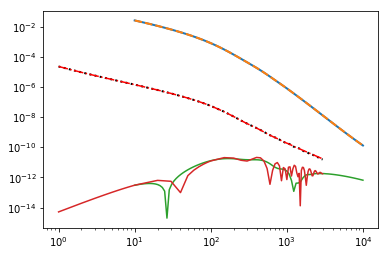

In [39]:
plt.plot(L, -reskk1, lw=2)
plt.plot(L, reskk2, '--', lw=2)
plt.plot(ell, abs(firsttermall), 'k:', lw=2)
plt.plot(ell, abs(secondtermall), 'r-.')
plt.plot(L, abs(reskk1 + reskk2))
plt.plot(ell, abs(firsttermall+secondtermall))
plt.loglog()

# Diagnostic


(0, 200)

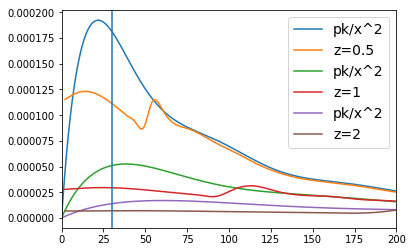

In [193]:
path = '/global/homes/c/chmodi/Programs/class_public/pborncross/diagnostic/'
cl = np.loadtxt(path + 'diagnostic_cl.dat').T
pk = np.loadtxt(path + 'diagnostic_z2_pk_nl.dat').T
pk2 = np.loadtxt(path + 'diagnostic_z3_pk_nl.dat').T
pk3 = np.loadtxt(path + 'diagnostic_z4_pk_nl.dat').T

dz=0.01

z0=0.5
xi = cosmo.xia(z=z0)
delxi = cosmo.xia(z=z0+dz) - cosmo.xia(z=z0-dz)
z0=1
xi2 = cosmo.xia(z=z0)
delxi2 = cosmo.xia(z=z0+dz) - cosmo.xia(z=z0-dz)
z0=2
xi3 = cosmo.xia(z=z0)
delxi3 = cosmo.xia(z=z0+dz) - cosmo.xia(z=z0-dz)

elk = pk[0]*xi
elk2 = pk[0]*xi2
elk3 = pk[0]*xi3

plt.plot(elk, 1*pk[1]/xi**2/delxi, label='pk/x^2')
plt.plot(cl[0,:-1], 2*np.pi*cl[8, :-1]/(cl[0, :-1]*cl[0, 1:]), label='z=0.5')

plt.plot(elk2, 1*pk2[1]/xi2**2/delxi2, label='pk/x^2')
plt.plot(cl[0, :-1], 2*np.pi*cl[13, :-1]/(cl[0, :-1]*cl[0, 1:]), label='z=1')

plt.plot(elk3, 1*pk3[1]/xi3**2/delxi3, label='pk/x^2')
plt.plot(cl[0, :-1], 2*np.pi*cl[17, :-1]/(cl[0, :-1]*cl[0, 1:]), label='z=2')

plt.axvline(30)
plt.legend(fontsize=14)
plt.xlim(0, 200)

# plt.yscale('log')
# plt.xscale('log')

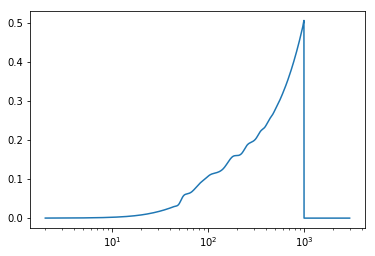

In [194]:
plt.plot(cl[0], cl[8])
plt.xscale('log')

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide


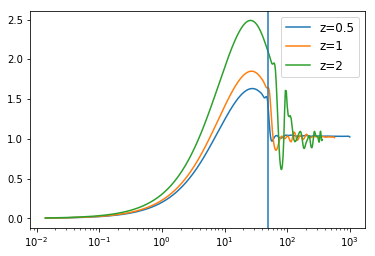

In [199]:
# num=  1*pk[1]/xi**2
num=  1*pk[1]/xi**2/delxi
den = np.interp(elk, cl[0,:-1], 2*np.pi*cl[8, :-1]/(cl[0, :-1]*cl[0, 1:]))
plt.plot(elk, num/den, label='z=0.5')

num=  1*pk2[1]/xi2**2/delxi2
den = np.interp(elk2, cl[0,:-1], 2*np.pi*cl[13, :-1]/(cl[0, :-1]*cl[0, 1:]))
plt.plot(elk, num/den, label='z=1')

num=  1*pk3[1]/xi3**2/delxi3
den = np.interp(elk3, cl[0,:-1], 2*np.pi*cl[17, :-1]/(cl[0, :-1]*cl[0, 1:]))
plt.plot(elk, num/den, label='z=2')

plt.legend(fontsize=12)
# plt.xlim(1e-2, 1)
# plt.ylim(0, 2)
plt.axvline(50)
plt.xscale('log')

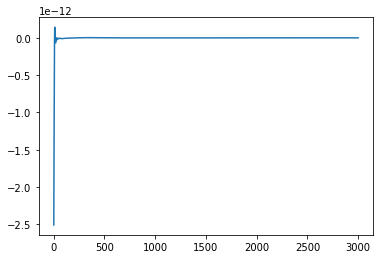

In [86]:
plt.plot(cl[0], cl[7], label='cl')
